In [1]:

import numpy as np
import pandas as pd
import networkx as nx
import itertools
from random import shuffle
from scipy.special import gammaln
from collections import OrderedDict
import matplotlib.pyplot as plt
import time

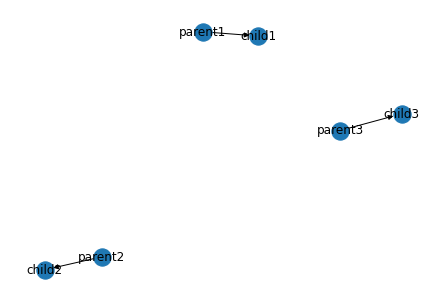

In [2]:
df1 = pd.read_csv("example/example.csv")

df_vars =df1.columns
df_vars
G = nx.Graph()
G.add_nodes_from(df_vars)
G.nodes()
H = nx.DiGraph(G)
H.add_edges_from([('parent1','child1'),('parent2','child2'),('parent3','child3')])
nx.draw(H,with_labels = True)

In [3]:
d = pd.read_csv("example/example.csv")

In [4]:
# compute score from list of node paramters
def bayesianScore(L):
    '''
    L is a list where each entry i is
    aa numpy array of shape (q_i, r_i)
    
    we assume that alpha_ijk = 1 for all i,j,k
    
    and P(G) can be disregarded
    '''
    score = 0
    for i,m in enumerate(L):
        alphas = np.ones(m.shape)
        #print m.sum(axis=0)
        A = (gammaln(alphas.sum(axis=1)) - gammaln(alphas.sum(axis=1) + m.sum(axis=1))).sum()
        B = (gammaln(alphas + m) - gammaln(alphas)).sum(axis=0).sum()
        #print A, B
        score += (A + B).sum()
    return score

In [5]:
def compute_counts(node, parents, dataset):
    '''
    returns a (q_i, r_i) numpy array with counts
    
    node is a string, representing the node/column
    
    parents is a list of strings
    
    dataset is a pandas dataframe
    '''
    
    # for each ijk get count of ocurrences
    if parents:
        m = pd.pivot_table(dataset[[node]+parents], 
                       index=parents, columns=node, aggfunc=len).fillna(0).as_matrix()
    else:
        vals = dataset[node].value_counts().as_matrix()
        m = np.zeros((1,len(vals)))
        m[0,:] = vals
        
    return m

In [6]:
parents = ["parent1","parent2","parent3"]
nodes = G.nodes()
nodes = list(d.columns)
print(nodes)


['parent1', 'child1', 'parent2', 'child2', 'parent3', 'child3']


In [7]:
np.ones([5,3])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [8]:
# node = df_vars[1]

# for i in parents:
#     for j in df_vars:
#         m = pd.pivot_table(d[[j]+parents], 
#                         index=parents, columns=node, aggfunc=len).fillna(0).as_matrix()

#     print(m)

In [124]:
df = pd.pivot_table(d[["child1"] + parents],index=parents,columns=["child1"], aggfunc=len).fillna(0)

In [125]:
d

,parent1,child1,parent2,child2,parent3,child3
0,3,3,2,3,1,3
1,1,3,2,3,2,3
2,3,1,1,2,3,1
3,1,3,1,2,3,2
4,2,3,3,2,2,1
5,1,3,1,1,1,3
6,1,3,3,1,2,3
7,3,3,2,3,1,3
8,1,3,1,3,2,1
9,3,1,1,3,3,3


In [126]:
# df
df

child1                     1    2    3
parent1 parent2 parent3               
1       1       1        0.0  0.0  1.0
                2        0.0  1.0  1.0
                3        0.0  0.0  2.0
        2       2        0.0  0.0  1.0
                3        1.0  0.0  0.0
        3       2        0.0  0.0  1.0
2       1       2        0.0  1.0  0.0
        2       3        0.0  0.0  1.0
        3       1        0.0  1.0  0.0
                2        0.0  0.0  3.0
3       1       1        1.0  0.0  0.0
                3        3.0  0.0  0.0
        2       1        0.0  0.0  2.0

In [166]:
# How to get parents
def count_func (input_data,dag):
    
    H = dag
    d = input_data
    alpha = 1
    score = 0
    df_return = list()

    for i in d.columns:
        ls = list(H.predecessors(i))
        if len(ls) != 0:
            
            df = pd.pivot_table(d[[i] + ls],index=ls,columns=[i],
             aggfunc=len).fillna(0).values
        else:
            d_sub = d[i].value_counts().fillna(0).values
            df = np.zeros((1,len(d_sub)))

        #print(df)
        print(df_return)

        df_return.append(df)
    
    return df_return
        #for j in enumerate(df):
        # alphas = np.ones(df.shape)
        # print(df.sum(axis=0))
        # A = (gammaln(alphas.sum(axis=1)) - gammaln(alphas.sum(axis=1) + df.sum(axis=1))).sum()
        # B = (gammaln(alphas + df) - gammaln(alphas)).sum(axis=0).sum()
        # #print A, B
        # score += (A + B).sum()
        # print(score)




In [167]:
#count_func(d,H)
df_out = count_func(d,H)




[]
[array([[0., 0., 0.]])]
[array([[0., 0., 0.]]), array([[1., 1., 6.],
       [0., 2., 4.],
       [4., 0., 2.]])]
[array([[0., 0., 0.]]), array([[1., 1., 6.],
       [0., 2., 4.],
       [4., 0., 2.]]), array([[0., 0., 0.]])]
[array([[0., 0., 0.]]), array([[1., 1., 6.],
       [0., 2., 4.],
       [4., 0., 2.]]), array([[0., 0., 0.]]), array([[1., 3., 6.],
       [0., 0., 5.],
       [2., 1., 2.]])]
[array([[0., 0., 0.]]), array([[1., 1., 6.],
       [0., 2., 4.],
       [4., 0., 2.]]), array([[0., 0., 0.]]), array([[1., 3., 6.],
       [0., 0., 5.],
       [2., 1., 2.]]), array([[0., 0., 0.]])]


In [180]:
score = 0
for i,m in enumerate(df_out):
    alphas = np.ones(m.shape)
    #print m.sum(axis=0)
    A = (gammaln(alphas.sum(axis=1)) - gammaln(alphas.sum(axis=1) + m.sum(axis=1))).sum()
    B = (gammaln(alphas + m) - gammaln(alphas)).sum(axis=0).sum()
    #print A, B
    score += (A + B).sum()
    print(score)

0.0
-19.912523603060293
-19.912523603060293
-40.325822494033076
-40.325822494033076
-61.049276313309704
